# **Iris Flower Classification**

In [1]:
#Importing Libraries
#Data Manipulation
import pandas as pd
import numpy as np

#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from math import exp
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,accuracy_score,confusion_matrix
from sklearn.metrics import explained_variance_score
import seaborn as sns

#importing the necessary libraries for encoding, standardization and splitting the dataset
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

#importing libraries for the classifier models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score

#Apply some Styling
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12,6)
sns.set_style('whitegrid')

#Filter warnings
import warnings
warnings.filterwarnings('ignore')

Exploratory Data Analysis

In [2]:
#Reading data
data = pd.read_csv("Iris.csv")

In [3]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
data.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


In [5]:
data.tail(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
data.shape

(150, 6)

In [7]:
fields = data.columns #returns the column names in the dataset
fields

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [8]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
data.dtypes #determines datatype of the columns in dataset

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [11]:
data.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [12]:
data.duplicated().sum()

0

In [13]:
data.isna().sum() #determines the sum of null values for each columns in the dataset

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [14]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [15]:
#renaming the columns for easier use
data.rename(columns={'SepalLengthCm': 'sepalLength', 'SepalWidthCm': 'sepalWidth', 'PetalLengthCm': 'petalLength', 'PetalWidthCm': 'petalWidth', 'Species': 'species'}, inplace=True)
data.rename(columns={'Id': 'id'}, inplace=True)

In [16]:
data.head(5)

,id,sepalLength,sepalWidth,petalLength,petalWidth,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
#removing the 'id' column as it is irrelevant
data = data.drop('id', axis=1)

In [18]:
n = len(data[data['species'] == 'Iris-versicolor'])
print("No of Versicolor in Dataset:",n)

No of Versicolor in Dataset: 50


In [19]:
n1 = len(data[data['species'] == 'Iris-virginica'])
print("No of Virginica in Dataset:",n1)

No of Virginica in Dataset: 50


In [20]:
n2 = len(data[data['species'] == 'Iris-setosa'])
print("No of Setosa in Dataset:",n2)

No of Setosa in Dataset: 50


Visualization of Datsaset

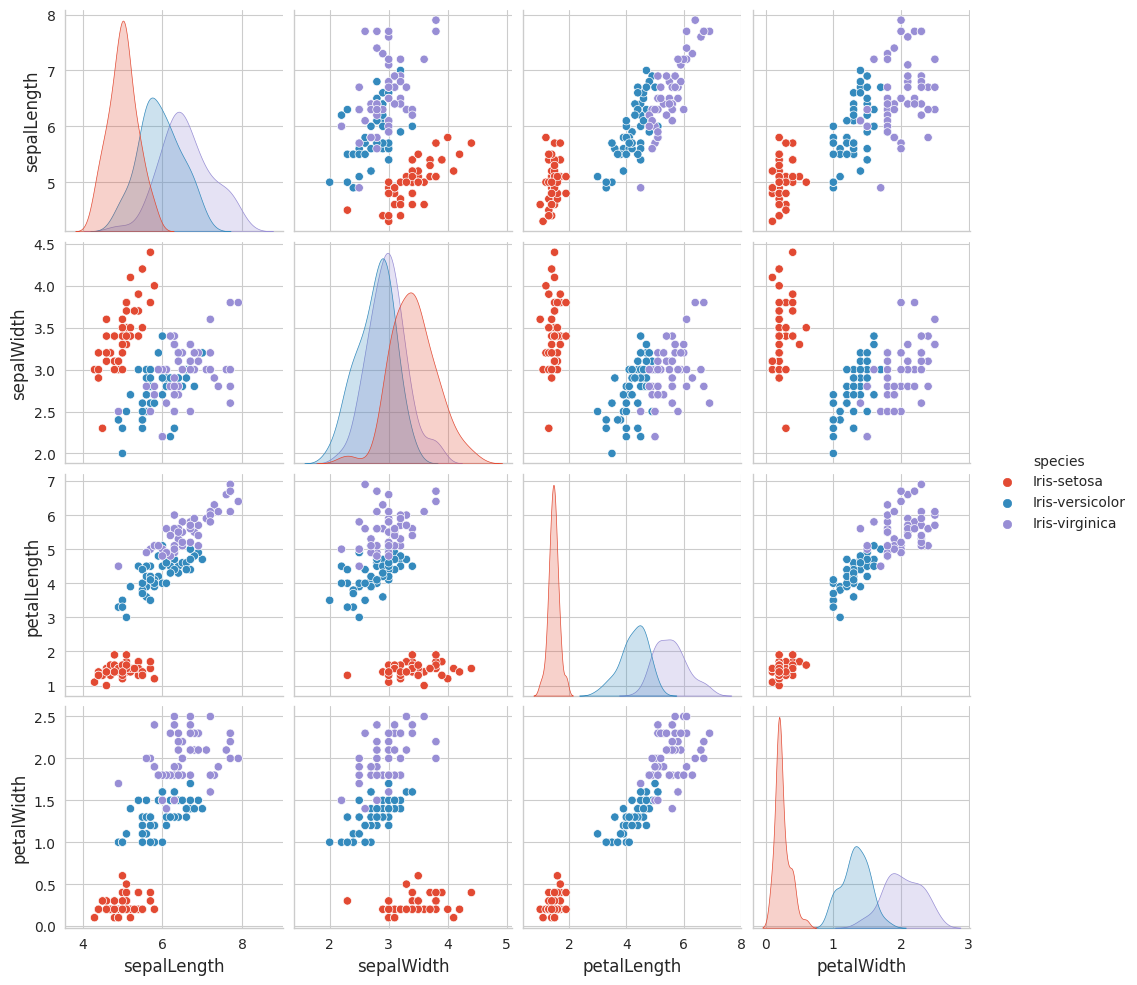

In [21]:
sns.pairplot(data, hue = 'species')

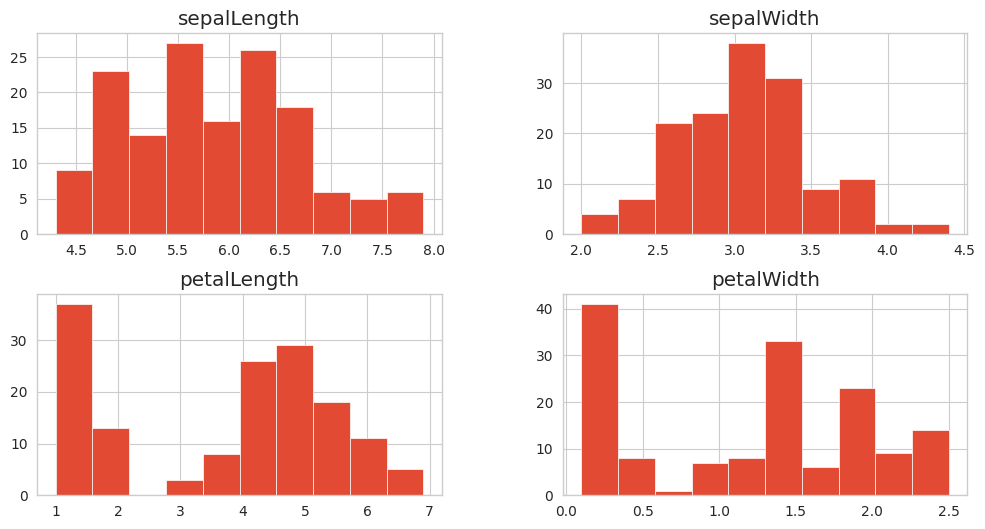

In [22]:
data.hist()
plt.show()

<Axes: xlabel='species', ylabel='sepalWidth'>

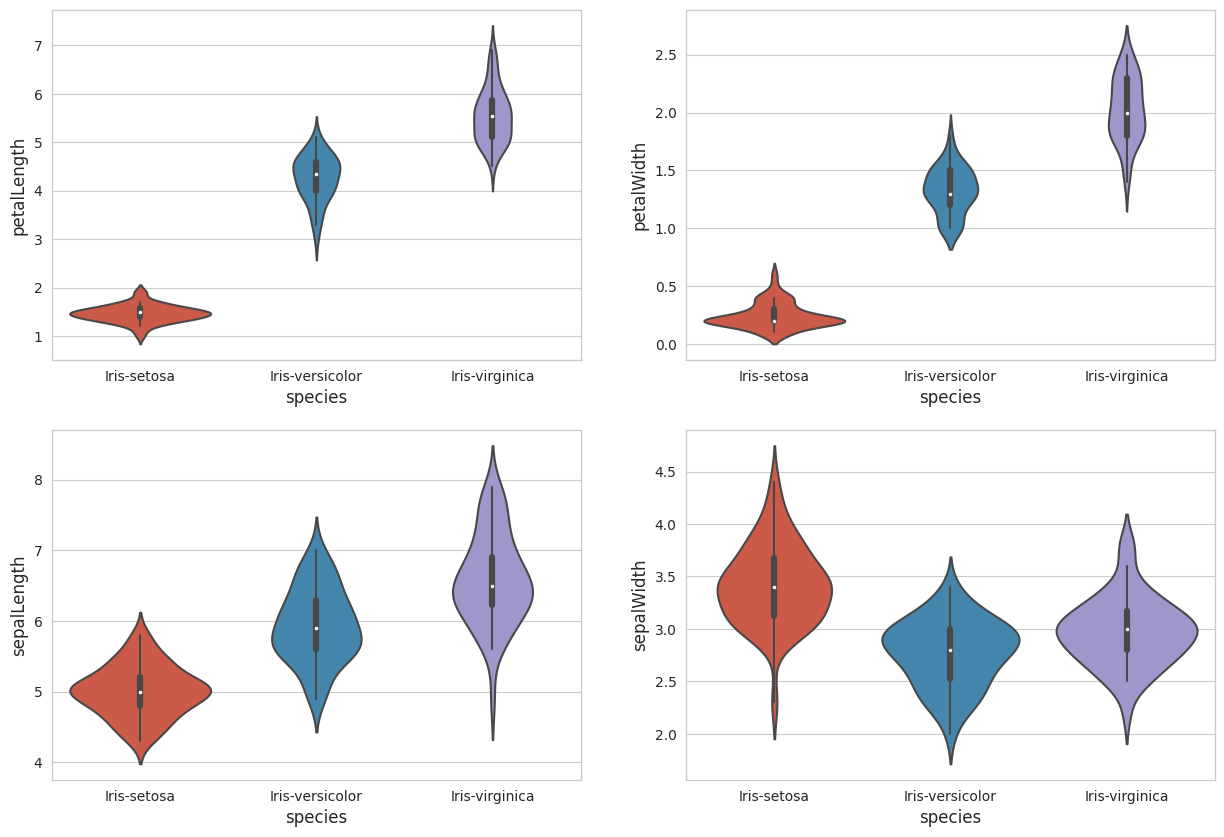

In [23]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='species',y='petalLength',data=data)
plt.subplot(2,2,2)
sns.violinplot(x='species',y='petalWidth',data=data)
plt.subplot(2,2,3)
sns.violinplot(x='species',y='sepalLength',data=data)
plt.subplot(2,2,4)
sns.violinplot(x='species',y='sepalWidth',data=data)

Data Preprocessing

In [24]:
#encoding the categorical variable (species)
encoder = LabelEncoder()
data['species'] = encoder.fit_transform(data['species'])

In [25]:
#splitting the data into features and target
X = data.drop('species', axis=1)
y = data['species']

In [26]:
#splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=49)

In [27]:
#scaling the numeric variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Application of ML Models for the above Training and Testing sets

In [28]:
#creating objects of the ML models
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
nb = GaussianNB()
svm = SVC()

In [29]:
#training the models with training dataset
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
nb.fit(X_train, y_train)
svm.fit(X_train, y_train)

SVC()

Evaluation of Trained data

In [30]:
#evaluation of the trained models
lr_output = lr.predict(X_test)
dt_output = dt.predict(X_test)
rf_output = rf.predict(X_test)
nb_output = nb.predict(X_test)
svm_output = svm.predict(X_test)

In [31]:
print("Logistic Regression:")
print("Classification Report:\n", classification_report(y_test, lr_output))
print("Accuracy:", accuracy_score(y_test, lr_output))

Logistic Regression:
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.90      0.90      0.90        10
           2       0.92      0.92      0.92        12

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30

Accuracy: 0.9333333333333333


In [32]:
print("Decision Tree:")
print("Classification Report:\n", classification_report(y_test, dt_output))
print("Accuracy:", accuracy_score(y_test, dt_output))

Decision Tree:
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.82      0.90      0.86        10
           2       0.91      0.83      0.87        12

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30

Accuracy: 0.9


In [33]:
print("Random Forest:")
print("Classification Report:\n", classification_report(y_test, rf_output))
print("Accuracy:", accuracy_score(y_test, rf_output))

Random Forest:
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.90      0.90      0.90        10
           2       0.92      0.92      0.92        12

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30

Accuracy: 0.9333333333333333


In [34]:
print("Support Vector Machine:")
print("Classification Report:\n", classification_report(y_test, svm_output))
print("Accuracy:", accuracy_score(y_test, svm_output))

Support Vector Machine:
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.90      0.90      0.90        10
           2       0.92      0.92      0.92        12

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30

Accuracy: 0.9333333333333333


In [35]:
print("Naive Bayes Classifier:")
print("Classification Report:\n", classification_report(y_test, nb_output))
print("Accuracy:", accuracy_score(y_test, nb_output))

Naive Bayes Classifier:
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.91      1.00      0.95        10
           2       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Accuracy: 0.9666666666666667


In [36]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','Support Vector Machines', 'Naive Bayes','Random Forest' ,'Decision Tree'],
    'Score': [0.93,0.93,0.967,0.93,0.9]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
0.967,Naive Bayes
0.930,Logistic Regression
0.930,Support Vector Machines
0.930,Random Forest
0.900,Decision Tree


1. Decision Tree and Random Forest Accuracy is 1. Hence, we conclude those are the best model for Iris Classification dataset.

**Prediction Algorithm**

In [37]:
#we need sepallength, sepalwidth, petallength & petalwidth to identify the species
newSL = float(input("sepalLength : "))
newSW = float(input("sepalWidth : "))
newPL = float(input("petalLength : "))
newPW = float(input("petalWidth : "))
#newS = float(input("spe : "))


sepalLength : 6
sepalWidth : 6
petalLength : 6
petalWidth : 6


In [38]:
#converting the input values to a dataframe
newValue = pd.DataFrame([[newSL, newSW, newPL, newPW]])

In [39]:
#scaling the user input
newValue = scaler.fit_transform(newValue)

In [40]:
newValue

array([[0., 0., 0., 0.]])

In [41]:
#predicting the output for the newValue
prediction = rf.predict(newValue)

In [42]:
#decoding the output by mapping predicted labels to the original species
finalAns = encoder.inverse_transform(prediction)

In [43]:
#classification of the species
finalAns[0]

'Iris-versicolor'